In [6]:
ROOT = '/home/yuli_zeira/Cognatehood/'
ENG = 'eng'
SPA = 'spa'

In [2]:
BI_INSERTION_0 = ROOT + 'char_weights/alphabet/insertion_0_2'
BI_DELETION_0 = ROOT + 'char_weights/alphabet/deletion_0_2'
BI_SUBSTITUTION_0 = ROOT + 'char_weights/alphabet/substitution_0_2'

BI_INSERTION_1 = ROOT + 'char_weights/alphabet/insertion_1_2'
BI_DELETION_1 = ROOT + 'char_weights/alphabet/deletion_1_2'
BI_SUBSTITUTION_1 = ROOT + 'char_weights/alphabet/substitution_1_2'

TRI_INSERTION = ROOT + 'char_weights/alphabet/insertion_tri_2'
TRI_DELETION = ROOT + 'char_weights/alphabet/deletion_tri_2'
TRI_SUBSTITUTION = ROOT + 'char_weights/alphabet/substitution_tri_2'

IPA_BI_INSERTION_0 = ROOT + 'char_weights/ipa/ipa_insertion_0_2'
IPA_BI_DELETION_0 = ROOT + 'char_weights/ipa/ipa_deletion_0_2'
IPA_BI_SUBSTITUTION_0 = ROOT + 'char_weights/ipa/ipa_substitution_0_2'

IPA_BI_INSERTION_1 = ROOT + 'char_weights/ipa/ipa_insertion_1_2'
IPA_BI_DELETION_1 = ROOT + 'char_weights/ipa/ipa_deletion_1_2'
IPA_BI_SUBSTITUTION_1 = ROOT + 'char_weights/ipa/ipa_substitution_1_2'

IPA_TRI_INSERTION = ROOT + 'char_weights/ipa/ipa_insertion_tri_2'
IPA_TRI_DELETION = ROOT + 'char_weights/ipa/ipa_deletion_tri_2'
IPA_TRI_SUBSTITUTION = ROOT + 'char_weights/ipa/ipa_substitution_tri_2'

In [4]:
import stanza
import epitran

In [5]:
IPA_CHARS = ['p', 'e', 'ɾ', 'o', 'i', 's', 'x', 'a', 'l', 'k', 'd', 'n', 'we',
             'b', 't', 'm', 'ɡ', 'f', 'u', 'jo', 't͡ʃ', 'ja', 'ʝ', 'je', '',
             'si', 'se', 'xe', 'wa', 'w', 'ɡi', 'r', 'ks', 'ɡw', 'wi', 'ɡe',
             'xi', 'ju', 'wo', 'ʃ', 'ɲ', 't͡ɬ', 't͡s', 'æ', 'ɹ̩', 'ð', 'ɪ', 'j',
             'd͡ʒ', 'ʌ', 'ɑ', 'ə', 'h', 'ɹ', 'ŋ', 'ɔ', 'ʊ', 'z', 'v', 'ɛ', 'θ',
             'ʒ']
ABC = 'abcdefghijklmnopqrstuvwxyz'
SPANISH_ABC = 'abcdefghijklmnopqrstuvwxyzñúóéáíü'

english = stanza.Pipeline(lang='en', processors='tokenize,lemma')
spanish = stanza.Pipeline(lang='es', processors='tokenize,lemma')
trans_spanish = epitran.Epitran('spa-Latn')
trans_english = epitran.Epitran('eng-Latn')

def is_lemma(word: str, lang: str) -> str:
    if lang == ENG:
        lemma = english(word).sentences[0].words[0].lemma
        if not lemma:
            return ''
        lemma = lemma.lower()
        ipa = trans_english.trans_list(lemma)
        for char in ipa:
            if char not in IPA_CHARS:
                print('no ipa', word, lemma)
                return ''
        for char in lemma:
            if char not in ABC:
                print('no alphabet', word, lemma)
                return ''
    else:
        lemma = spanish(word).sentences[0].words[0].lemma
        if not lemma:
            return ''
        ipa = trans_spanish.trans_list(lemma)
        for char in ipa:
            if char not in IPA_CHARS:
                print(word, lemma)
                return ''
        lemma = lemma.lower()
        for char in lemma:
            if char not in SPANISH_ABC:
                print(word, lemma)
                return ''
    if word == lemma:
        return word
    else:      
        return ''


def keep_lemmas(word_vec_file: str, lang: str, output_file: str, from_=0) -> None:
    with open(word_vec_file, 'r') as f:
        with open(output_file, 'a') as ff:
            for i, line in enumerate(f):
                if i < from_:
                    continue
                split_line = line.split()
                word = split_line[0]
                if is_lemma(word, lang):
#                     ff.write(line + '\n')
                    ff.write(line)
                if i % 5000 == 0:
                    print(i, word, is_lemma(word, lang))

2023-07-13 08:13:55 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2023-07-13 08:13:55 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| lemma     | combined |

INFO:stanza:Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| lemma     | combined |

2023-07-13 08:13:55 INFO: Use device: cpu
INFO:stanza:Use device: cpu
2023-07-13 08:13:55 INFO: Loading: tokenize
INFO:stanza:Loading: tokenize
2023-07-13 08:13:55 INFO: Loading: lemma
INFO:stanza:Loading: lemma
2023-07-13 08:13:56 INFO: Done loading processors!
INFO:stanza:Done loading processors!
2023-07-13 08:13:56 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=Non

2023-07-13 08:13:56 WARNING: Language es package default expects mwt, which has been added
2023-07-13 08:13:56 INFO: Loading these models for language: es (Spanish):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| lemma     | ancora  |

INFO:stanza:Loading these models for language: es (Spanish):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| lemma     | ancora  |

2023-07-13 08:13:56 INFO: Use device: cpu
INFO:stanza:Use device: cpu
2023-07-13 08:13:56 INFO: Loading: tokenize
INFO:stanza:Loading: tokenize
2023-07-13 08:13:56 INFO: Loading: mwt
INFO:stanza:Loading: mwt
2023-07-13 08:13:56 INFO: Loading: lemma
INFO:stanza:Loading: lemma
2023-07-13 08:13:56 INFO: Done loading processors!
INFO:stanza:Done loading processors!


In [5]:
keep_lemmas(ROOT + 'embeddings/en_embeddings.vec', 'eng', ROOT + 'embeddings/en_embeddings_lemmas_1.vec', 125000)

125000 matang matang
no ipa ostpreußen ostpreußen
no ipa tygři tygři
no alphabet ɔ ɔ
no ipa δαvιs δαvιs
no ipa matsusaka mat.usaka
no ipa ismaïl ismaïl
no ipa kőszeg kőszeg
no ipa wifu wifum-
no ipa kłodzka kłodzka
no ipa hamgyŏng hamgyŏng
no ipa złoczew złoczew
130000 haledon haledon
no ipa thục thục
no ipa discuß discuß
no ipa wiśniewski wiśniewski
no ipa głowacki głowacki
no ipa anaiṫnid anaiṫnid
no ipa preuß preuß
no ipa fuß fuß
no ipa małachowski małachowski
no ipa wołyń woły
no ipa bouïra bouïra
no ipa kauaʻi kauaʻi
no ipa gŭl gŭl
135000 interconversion interconversion
no ipa kołakowski kołakowski
no ipa humanoïdes humanoïdes
no ipa skłodowska skłodowska
no ipa wyszyński wyszyński
no ipa pawłowski pawłowski
no ipa ludu ludum-
no ipa marszałek marszałek
no ipa wafu wafum-
no ipa yvel yvelexpusec@ect
no ipa łazy łazy
no ipa supraśl supraśl
no ipa δh δh
no ipa preußischen preußischen
no ipa łaski łaski
no ipa tarło tarło
no ipa szydłowo szydłowo
140000 torzhok torzhok
no ipa maxïmo 

no ipa faÿ faÿ
no ipa yŏngŭi yŏngŭi
no ipa adelaïde adelaïde
no ipa gβγ gβ
no ipa karaś karaś
no ipa kʷ kan-
no ipa małecki małecki
no ipa łomazy łomazy
no ipa bieliński bieliński
no ipa wiśniew wiśniew
no ipa bałachowicz bałachowicz
no ipa dollfuß dollfuß
no ipa kłomnice kłomnice
no ipa qurۥan qurۥan
no ipa rußland rußland
no ipa średnie średnie
no ipa hoffenberg hoffenbergergen<sos>en<sos>erg
no ipa phụng phụng
no ipa pparγ pparγ
no ipa jabłonka jabłonka
no ipa młynarczyk młynarczyk
no ipa słonim słonim
no ipa bułak bułak
no ipa thụy thụy
no ipa poststraße poststraße
235000 danemark danemark
no alphabet tʃ tʃ
no ipa pkcε pkcε
no ipa ș ș
no ipa schulstraße schulstraße
no ipa tatrzańska tatrzańska
no ipa főnix főnix
no ipa hiển hiển
no ipa caïn caïn
no ipa rościszewo rościszewo
no ipa prakṛti prakṛti
no ipa iː iː
no ipa szydło szydło
no ipa aïcha aïcha
no ipa totse tot.
no ipa belaïd belaïd
no ipa nußbach nußbach
no ipa rybczyński rybczyński
no ipa wołodyjowski wołodyjowski
no ipa włos

no ipa białkowski białkowski
no ipa łagoda łagoda
no ipa ṣa ṣa
no ipa siddhaṃ siddhaṃ
no ipa aßmann aßmann
no ipa świst świst
no ipa łabowa łabowa
no ipa głusk głusk
no ipa kabangu kab.agu
315000 eybler eybler
no ipa kowŏn kowŏn
no ipa wołoska wołoska
no ipa dobiesław dobiesław
no ipa leśmian leśmian
no ipa tα tα
no ipa małek małek
no ipa orłowo orłowo
no ipa belaïli belaïli
no ipa bất bất
no ipa bismarckstraße bismarckstraße
no ipa łucznik łucznik
no ipa szukała szukała
no ipa łoziński łoziński
no ipa piekło piekło
no ipa ług ług
no ipa kaiserstraße kaiserstraße
no ipa kościałkowski kościałkowski
no ipa erős erős
no ipa białostocki białostocki
no ipa chiểu chiểu
no ipa hsľs hsľs
320000 brookport brookport
no ipa cống cống
no ipa gaṇa gaṇa
no ipa naheweinstraße naheweinstraße
no ipa naïvety naïvety
no ipa włochy włochy
no ipa yǒng yǒng
no ipa myśl myśl
no ipa thực thực
no ipa jiǎ jiǎ
no ipa sống sống
no ipa guṇa guṇa
no ipa wysoczański wysoczański
no ipa șimleului șimleului
no ipa śmia

no ipa hồn hồn
no ipa boïeldieu boïeldieu
no ipa kīwalaʻō kīwalaʻō
no ipa średnia średnia
no ipa gawłowski gawłowski
no ipa głuchowski głuchowski
no ipa goeßling goeßling
no ipa moïso moïso
no ipa buß buß
no ipa kŭmgol kŭmgol
no ipa altlußheim altlußheim
no ipa ppłk ppłk
no ipa ķemeri ķemeri
no ipa großschmetterlinge großschmetterlinge
395000 nivasa nivasa
no ipa rheinpreußen rheinpreußen
no ipa głodowo głodowo
no ipa thiều thiều
no ipa εi εi
no ipa kʰ kan-
no ipa otoku otok0
no ipa gσмg gσмg
no ipa ḫaldi ḫaldi
no ipa ʻakepa ʻakepa
no ipa gαi gαi
no ipa phấn phấn
no ipa sphoṭa sphoṭa
no ipa dǒng dǒng
no ipa kościelisko kościelisko
no ipa samjiyŏn samjiyŏn
no ipa női női
no ipa społeczeństwo społeczeństwo
no ipa ṣabr ṣabr
no ipa jiǎo jiǎo
no ipa rouïba rouïba
no ipa ludwigstraße ludwigstraße
no ipa adevĕrul adevĕrul
no ipa iκbα iκbα
no ipa riềng riềng
400000 aeka aeka
no ipa homœopathic homœopathic
no ipa opałka opałka
no ipa tất tất
no ipa raïssa raïssa
no ipa diǎn diǎn
no ipa dioïla d

no ipa rồi rồi
no ipa ŭiju ŭiju
no ipa aïnouz aïnouz
no ipa kościelecki kościelecki
no ipa bốn bốn
no ipa dựng dựng
no ipa ḥai ḥai
no ipa klaußner klaußner
no ipa łazienkowska łazienkowska
no ipa laï laï
470000 acronyctoides 
no ipa niepodległej niepodległej
no ipa μb μb
no ipa giurgiulești giurgiulești
no ipa przybył przybył
no ipa khởi khởi
no ipa ouli oul.
no ipa rosenstraße rosenstraße
no ipa błoński błoński
no ipa vãµro vãµro
no ipa ƴ ƴ
no ipa orłem orłem
no ipa ławy ławy
no ipa białymstoku białymstoku
no ipa tŵr tŵr
no ipa tồn tồn
no ipa bałuszyński bałuszyński
no ipa azalaïs azalaïs
no ipa thật thật
no ipa kobyliński kobyliński
no ipa moinești moinești
no ipa misraïm misraïm
no ipa craiovești craiovești


KeyboardInterrupt: 

In [6]:
keep_lemmas(ROOT + '/embeddings/es_embeddings.vec', 'spa', ROOT + '/embeddings/es_embeddings_lemmas_1.vec')

0 de de
º º
ª ª
inc inc1
5000 urss 
für für
müller müller
ºc ºc
théâtre théâtre
instalada instalado-AB
10000 carrión carrión
über über
düsseldorf düsseldorf
jürgen jürgen
münchen münchen
15000 ieee ieee
ucd uc1
münster münster
tomáš tomáš
zürich zürich
württemberg württemberg
chiba chibam<SOS>
20000 hasan hasan
müll müll
jiří jiří
jérôme jérôme
poznań poznań
dvořák dvořák
hélène hélène
25000 msc msc
lübeck lübeck
štěpánek štěpánek
łódź łódź
šmíd šmíd
kulübü kulübü
μm μm
führer führero
incendiado incendiar-b2
crüe crüe
nürnberg nürnberg
cœur cœur
þáttr þáttr
stanisław stanisław
montjuïc montjuïci
plíšková plíšková
šafářová šafářová
atatürk atatürk
µm µm
mézières mézières
schüttler schüttler
30000 reemplazante reemplazante
čermák čermák
saarbrücken saarbrücken
warnes <unk>ar
nürburgring nürburgring
déjà déjà
conferido conferido-
thérèse thérèse
tübingen tübingen
české české
wolfenbüttel wolfenbüttel
große große
lukáš lukáš
œuvre œuvre
rpc rpc100
zweibrücken zweibrücken
würzburg würzburg


lübke lübke
brûlée brûlée
schaubühne schaubühne
115000 boquín boquín
büttner büttner
ródão ródão
zalayeta zalayetamen<SOS>e
haïtien haïtien
gomułka gomułka
bürgerschaft bürgerschaft
entführung entführun
pxc pxc10/100
kütahya kütahya
jüri jüri
ahmadzaï ahmadzaï
beüt beüt
bückeburg bückeburg
frühling frühling
şükrü şükrü
sigurðardóttir sigurðardóttir
andúnië andúnië
baïgorry baïgorry
λx λx
stürmer stürmer
věstonice věstonice
kießling kießling
flüelen flüelen
nước nước
małgorzata małgorzata
küssnacht tüssnacht
jüterbog jüterbog
kerületi kerületi
dü dü
gebrüder gebrüder
haïti haïti
ásatrúarfélagið ásatrúarfélagið
müstair müstair
maб maб
loral loralmen<SOS>
lüttwitz lüttwitz
cœurs cœurs
étrangères étrangèr
grünwald grünwald
münzer münzer
sońsk sońsk
120000 sayaxché sayaxché
flügels flügels
kühne kühne
biunívoca biunívocamen<SOS>
überlingen überlingen
kühner kühner
mühldorf mühldorf
sturmgeschütz sturmgeschütz
jüdische jüdische
štefánik štefánik
intérêt intérêt
bəhramov bəhramov
fürsten fürs

hüls hüls
hürriyet hürriyet
vgx vgx1o
ħamrun ħamrun
rüütel rüütel
blütenpflanzen blütenpflanzen
abdülmecit abdülmecit
główny główny
klɛmətis klɛmətis
linosa linosamen<SOS>
brück brück
zł zł
hyménoptères hyménoptèr
ľudovít ľudovít
araçá araçá
ßҩ ßҩ
zǐ zǐ
pɛ pɛ
überarbeitete überarbeitete
paüls paül
tübke tübke
mikhaïl mikhaïl
dühring dühring
büchel büchel
gönül gönül
braumüller braumüller
könyvkereskedés könyvkereskedés
garðaríki garðaríki
jüdischer jüdischer
küche küche
þormóður þormóður
kukliński kukliński
trị trị
hliðskjálf hliðskjálf
krüper krüper
xmb xmb100
jindřichův jindřichův
175000 discutiré discutiré
viaţa viaţa
světlá světlá
élève élève
düsseldorfer düsseldorfer
weltbühne weltbühne
nüsslein nüsslein
flür flür
künzelsau künzelsau
timiș timiș
hítdœlakappa hítdœlakappa
lời lời
wüster wüster
bücherei bücherei
staněk staněk
paštiková paštiková
šromová šromová
dülmen dülmen
grímsvötn grímsvötn
mühsam mühsam
begründung begründuna
ºo ºo
balatonfüred balatonfüred
hauptscharführer haup

matúš matúš
étc étc10
dzień dzień
südharz südharz
hrœrekr hrœrekr
palü palü
büsching büschinge
würstchen würstchen
thiện thiện
beïda beïda
lépidoptères lépidoptèr
knížectví knížectví
württembergisches württembergisches
nádraží nádraží
neßler neßler
egyesület egyesület
ġawr ġawr
rückoldt rückoldt
merxmüller merxmüller
bélâbre bélâbre
tüxen tüxen
cabº cabº
müzesi müzesi
gümrü gümrü
µl µl
flückiger flückiger
dvůr dvůr
güngör güngör
gemünden gemünden
amadeüs amadeüs
ossolińskich ossolińskich
puʻu puʻu
jarošík jarošík
hürth hürth
riß riß
guðjón guðjón
rühl rühl
brně brně
břetislav břetislav
qüestions qüestion
campañà campañà
mühlfeld mühlfeld
çayönü çayönü
lüpertz lüpertz
bütün bütün
němec němec
sárasuatī sárasuatī
schœlcher schœlcher
saïdia saïdia
splügen splügen
plœuc plœuc
naïr naïr
fühmann fühmann
prüfung prüfung
tü tü
südtiroler südtiroler
δo δo
225000 encorazado encorazado
monédières monédières
müsavat müsavat
shümom shümom
klüft klüft
müürsepp müürsepp
mercédès mercédès
grüsch grüsch

grünkohl grünkohl
dießen dießen
frühzeit Arühzeit
δd δd
velbrück velbrück
škamlová škamlová
alcáçova alcáçova
lüscherz lüscherz
jürgenson jürgenson
schützenfest schützenfest
indermühle indermühle
fěn fěn
moravčík moravčík
zülch zülch
fürstentums fürstentum
bạc bạc
táiwān táiwān
eliáš eliáš
stürme stürme
lüth lüth
ősi ősi
vjd vjd1o
büscher büscher
flühli flühli
münstereifel münstereifel
düben düben
florești florești
creţu creţu
rieß rieß
cβ cβ
týrlová týrlová
265000 hipocondriaco hipocondriaco
schneidemühl schneidemühl
dostoïevski dostoïevski
ásbjörnsson ásbjörnsson
fvv fvv100
mω mω
brunsbüttel brunsbüttel
préfère préfère
fünke fünke
lineolada lineoladamen<SOS>elada
grüntzig grüntzig
sünd sünd
fuhlsbüttel fuhlsbüttel
guðrúnarhvöt guðrúnarhvöt
kozáčik kozáčik
umění umění
tuyết tuyết
ańos ańos
prolégomènes prolégomèn
rasŏn rasŏn
nižná nižná
mêlées mêlées
ən ən
angermünde angermünde
kobaïa kobaïa
haïtienne haïtienne
südamerikanische südamerikanische
vườn vườn
teichmüller teichmüller
moţa m

rüdlingen rüdlingen
gründer gründer
parafünk parafünk
pleiß pleiß
gemeinnützige gemeinnützige
jasiński jasiński
aэродром aэродром
haţeg haţeg
hüfner hüfner
darraðarljóð darraðarljó
dünnhaupt dünnhaupt
küblis küblis
300000 mentálicos 
wiedźmin wiedźmin
naïs naïs
davíðsdóttir davíðsdóttir
lộc lộc
walldürn walldürn
þorgilsdóttir þorgilsdóttir
züchter züchter
sertürner sertürner
todsünden todsünden
rüthi rüthi
spořitelna spořitelna
opaliński opaliński
manœuvre manœuvre
złotów złotów
antü antü
büsch büsch
pražské pražské
gönlüm gönlüm
gunčíková gunčíková
güyük güyük
emmabuntüs emmabuntüs
δx δx
lögrétta lögrétta
λcdm λcdm
bülle bülle
düring düring
zličín zličín
südstadion südstadion
steinbauer steinba7er
čechách čechách
železná železná
chœurs chœurs
unterstützung unterstützun
lxm lxc10e
xagħra xagħra
œpir œpir
anlaß anlaß
müncheberg müncheberg
geschützwagen geschützwagen
ðiscusión ðiscusión
jiāláncài jiāláncài
malečková malečková
δq δq
svíþjóð svíþjó
železárny železárny
obrenovich obrenovec2

vánoční vánoční
szépművészeti szépművészeti
hüttemann hüttemann
kremsmünster kremsmünster
335000 noongars 
türkmen türkmen
niederhünigen niederhünigen
grünenplan grünenplan
přír přír
chemamüll chemamüll
hạt hạt
naţionale naţionale
navasqüés navasqüés
pflanzenzüchtung pflanzenzüchtung
reichführer reichführer
lüdtke lüdtke
focșani focșani
djúpúðga djúpúðga
műemlék műemlék
poźniak poźniak
rütschelen rütschelen
prüf prüf
yüksek yüksek
köprüsü köprüsü
rükl rükl
ʿali ʿali
lǣ lǣ
ʿazīz ʿazīz
lüder lüder
trắng trắng
sénèque sénèque
spytihněv spytihněv
frießner frießner
valčík valčík
shěng shěng
birutė birutė
rˁ rˁ
œdipus œdipus
móði móði
fünfzig fünfzig
piłki piłki
gōngyuán gōngyuán
ańo ańo
skała skała
blühende blühende
zü zü
büchergilde büchergilde
přemyslovci přemyslovci
erbisbühl erbisbühl
thürriegel thürriegel
kiskörút kiskörút
hülegü hülegü
frübeck frübeck
věstník věstník
brünner brünner
krüdener krüdener
saïgon saïgon
wüsthof wüsthof
grützmacher grützmacher
dudești dudești
südpolar südpol

γturc γturc
thức thức
gießener gießener
suǒ suǒ
münik münik
südwesten südwesten
prévenchères prévenchèr
gedővári gedővári
steinþórsson steinþórsson
bütschli bütschli
cường cường
bockemühl bockemühl
370000 aclimatarlo 
ufb ufb1o
szörény szörény
makeïeff makeïeff
dufaÿs dufaÿs
hütthaler hütthaler
víðópnir víðópnir
miền miền
gewürz gewürz
knüll knüll
jiřina jiřina
boleścin boleścin
wrocławiu wrocławiu
érès érès
bieńkowska bieńkowska
flügeln flügeln
sögufélag sögufélag
dünamünde dünamünde
clüver clüver
ménagères ménagères
hœdic hœdic
rüger rüger
auszüge auszüge
vitrifica vitrificamen2e
íþróttafélagið íþróttafélagið
gündüz gündüz
zərdab zərdab
þórisjökull þórisjökull
yüeh yüeh
mímameiðr mímameiðr
führen führen
bürgermeisters bürgermeisters
büste büste
rundstück rundstück
biển biển
saïb saïb
eĺ eĺ
kür kür
dźwigaj dźwigaj
breiðabólstaður breiðabólstaður
taïwan taïwan
maruščák maruščák
raïm raïm
sü sü
bergþóra bergþóra
itü itü
compañìa compañìa
fürstenthums fürstenthums
münsters münsters
üb üb

dürrenhorn dürrenhorn
convetido convetido-
cüppers cüpper
schüttorf schüttorf
züllichau züllichau
hüttikon hüttikon
vœuil vœuil
tubœuf tubœuf
stadtmüller stadtmüller
niи niи
śastras śastras
wißner wißner
voľa voľa
dvě dvě
aßlar aßlar
štiavnické štiavnické
brütten brütten
mở mở
kradschützen kradschützen
kürdəmir kürdəmir
pfeffermühle pfeffermühle
śa śa
ïnformación ïnformación
ševčík ševčík
ünye ünye
sº sº
pułk pułk
triết triết
öskjuhlíð öskjuhlíð
þrándr þrándr
musikkünstler musikkünstler
lützelau lützelau
pühajärv pühajärv
vijñāna vijñāna
gończy gończy
büyükkökten büyükkökten
güzelçamlı güzelçamlı
chérêt chérêt
idmangücü idmangücü
pottþétt pottþétt
müllner müllner
wesermünde wesermünde
ánthrōpos ánthrōpos
nützt nützt
carpaţi carpaţi
wünsdorf wünsdorf
hüttenberger hüttenberger
heřman heřman
gölcük gölcük
galerģa galerģa
gegründete gegründete
mündung mündung
fürstinnen fürstinnen
zəngilan zəngilan
říše říše
hückeswagen hückeswagen
dəmir dəmir
ayşegül ayşegül
adonaïs adonaïs
piódão piódão


mézères mézèr
prévadiès prévadiès
vaiņode vaiņode
sohüta sohüto
flüssigkeiten flüssigkeiten
mündleria mündleria
freqüência freqüência
sbeïtla sbeïtla
ütter ütter
süe süe
jánošík jánošík
oṁ oṁ
nə nə
fühle fühle
unterdießen unterdießen
rheinmünster rheinmünster
ludmiła ludmiła
sunnlendingafjórðungur sunnlendingafjórðungur
frédière frédière
caféière caféière
sümbül sümbül
ègbádò ègbádò
tïtulos tïtulo
ünlüler ünlüler
lögmannsannáll lögmannsannáll
bundesprüfstelle bundesprüfstelle
ℕixón ℕixón
şengün şengün
gekürzte gekürzte
denœux denœux
llïonés llïonés
entzündung entzündunim
maße maße
érôme érôme
windmühle windmühle
dülken dülken
büthe büthe
líð líð
județul județul
snæúlvur snæúlvur
θa θa
grünburg grünburg
wxc wxch100
saũ saũ
ős ős
matatoʻa matatoʻa
deßloch deßloch
thịt thịt
joüet joüet
südhessen südhessen
cuống cuống
kadłubska kadłubska
futbolʹnyĭ futbolʹny
anemüller anemüller
númeroº númeroº
440000 anticodones 
özgünsür özgünsür
türke türke
schülp schülp
barciś barciś
küchelbecker küchel

mœbius mœbius
stroiești stroiești
acriș acriș
fuhlbrügge fuhlbrügge
berggießhübel berggießhübel
sųłiné sųłiné
línguæ línguæ
münsing münsing
říšehvězd říšehvězd
śpiewa śpiewa
griviţa griviţa
bersenbrück bersenbrück
raüf raüf
złoczów złoczów
bartošová bartošová
schüll schüll
jǐ jǐ
nàmá nàmá
beleś beleś
bước bước
świdrów świdrów
hjálmþés hjálmþés
větrovcová větrovcová
gewünschte gewünschte
lohmüller lohmüller
nobilißimi nobilißimi
bensaïdi bensaïdi
grübe grübe
siguranţa siguranţa
sławków sławków
zieńczuk zieńczuk
süt süt
volapüka volapüka
πc πc
φιλíα φιλíα
idő idő
dŵr dŵr
sveitarfélagið sveitarfélagið
ülcha ülcha
lonomaʻaikanaka lonomaʻaikanaka
kurfürstinnen kurfürstinnen
büttikofer büttikofer
népomucène népomucène
ústřední ústřední
mládeže mládeže
tuần tuần
norðlendingafjórðungur norðlendingafjór
żebrówka żebrówka
gočár gočár
smetáček smetáček
someșul someșul
łapaj łapaj
füreder füreder
għ għ
edermünde edermünde
µx µx
ułani ułani
siyəzən siyəzən
xocavənd xocavənd
ejeŕcito ejeŕcito
470000

KeyboardInterrupt: 

In [2]:
from numpy import dot
from numpy.linalg import norm
import numpy
import json
from os import listdir


class SimilarityMeasure:

    def __init__(self, en_vecs_path: str, es_vecs_path: str, en_words: str, es_words: str):
        self._en_vecs_path = en_vecs_path
        self._es_vecs_path = es_vecs_path
        self._en_words, self._en_vecs, self._en_words_rev = self.load_vectors(en_vecs_path)
        self._es_words, self._es_vecs, self._es_words_rev = self.load_vectors(es_vecs_path)
        self._cos_sim = lambda a, b: ((dot(a, b) /  (norm(a) * norm(b))) + 1) * 0.5
        self._en_lemmas_corpus, self._es_lemmas_corpus = self.load_words(en_words, es_words)
        self._en_similarities, self._es_similarities = dict(), dict()

    @staticmethod
    def load_vectors(path: str):
        words, vectors, words_rev = dict(), list(), dict()
        with open(path, 'r') as f:
            for i, line in enumerate(f):
                line = line.split()
                word = line[0]
                words[word] = i - 1
                words_rev[i - 1] = word
                vectors.append(line[1:])
                if i % 50000 == 0:
                    print(i)
        print('Done!')
        return words, numpy.array(vectors, dtype=float), words_rev
    
    def load_words(self, en_words: str, es_words: str):
        en_lemmas_corpus, es_lemmas_corpus = list(), list()
        with open(en_words, 'r') as f:
            for line in f.readlines():
                en_lemmas_corpus.append(line[:-1].lower())
        with open(es_words, 'r') as f:
            for line in f.readlines():
                es_lemmas_corpus.append(line[:-1].lower())
        print('Done loading words!')
        return en_lemmas_corpus, en_lemmas_corpus
    
    def get_similarities(self, word: str, lang: str, filename: str):
        similarities = dict()
        if lang == 'eng':
            try:
                word_ind = self._en_words[word]
                word_vec = self._en_vecs[word_ind]
            except KeyError:
                  print(f'No representation for {word} ({lang})')
                  return
            for ind in self._es_words_rev.keys():
                similarities[self._es_words_rev[ind]] = [self._cos_sim(word_vec, self._es_vecs[ind])]
                # self._en_similarities[word][self._es_words_rev[ind]] = self._cos_sim(word_vec, self._es_vecs[ind])
        else:
            try:
                word_ind = self._es_words[word]
                word_vec = self._es_vecs[word_ind]
            except KeyError:
                  print(f'No representation for {word} ({lang})')
                  return
            for ind in self._en_words_rev.keys():
                similarities[self._en_words_rev[ind]] = [self._cos_sim(word_vec, self._en_vecs[ind])]
                # self._es_similarities[word][self._en_words_rev[ind]] = self._cos_sim(word_vec, self._en_vecs[ind])
        with open(filename, 'w') as f:
            json.dump(similarities, f)
    
    def get_all_similarities(self, en_output: str, es_output: str):
        print(len(listdir(en_output)), len(listdir(es_output)))
        en_words = [w for w in self._en_lemmas_corpus if w + '.json' not in listdir(en_output)]
        es_words = [w for w in self._es_lemmas_corpus if w + '.json' not in listdir(es_output)]
        for word in en_words:
            self.get_similarities(word, 'eng', en_output + word + '.json')
        for word in es_words:
            self.get_similarities(word, 'spa', es_output + word + '.json')

In [3]:
sm = SimilarityMeasure(ROOT + 'embeddings/en_embeddings_lemmas_1.vec',
                       ROOT + 'embeddings/es_embeddings_lemmas_1.vec',
                       ROOT + 'word_files/bm_lemmas_en.txt',
                       ROOT + 'word_files/bm_lemmas_es.txt')

0
50000
100000
150000
200000
250000
300000
350000
400000
Done!
0
50000
100000
150000
200000
250000
300000
350000
Done!
Done loading words!


In [4]:
sm.get_all_similarities(ROOT + 'measures/en_lemmas_sim/', ROOT + 'measures/es_lemmas_sim/')

294 0
No representation for camping (eng)
No representation for cooling (eng)
No representation for o'clock (eng)
No representation for finding (eng)
No representation for hiring (eng)


KeyboardInterrupt: 

In [11]:
from typing import Tuple
import pickle


class FormMeasure:

    def __init__(self, insertion, deletion, substitution, ind: int, ipa=False):
        self._is_ipa = ipa
        self._ind = ind
        self._insertion = self.unpickle_weights(insertion)
        self._deletion = self.unpickle_weights(deletion)
        self._substitution = self.unpickle_weights(substitution)
        self.make_n_gram = [self.make_n_gram_first, self.make_n_gram_second,
                            self.make_trigram][ind]

    @staticmethod
    def unpickle_weights(weight_file):
        with open(weight_file, 'rb') as f:
            weight_dict = pickle.load(f)
        return weight_dict

    def make_n_gram_first(self, word, k: int) -> Tuple[str]:
        if self._is_ipa:
            tup = [''] + word
        else:
            tup = [''] + list(word)
        new_tup = tup[k: k + 2]
        return tuple(new_tup)

    def make_n_gram_second(self, word, k: int) -> Tuple[str]:
        if self._is_ipa:
            tup = word + ['']
        else:
            tup = list(word) + ['']
        new_tup = tup[k: k + 2]
        return tuple(new_tup)

    def make_trigram(self, word, k: int) -> Tuple[str]:
        if self._is_ipa:
            tup = [''] + word + ['']
        else:
            tup = [''] + list(word) + ['']
        new_tup = tup[k: k + 3]
        return tuple(new_tup)

    def operations(self, ngram_1, ngram_2):
        if self._ind == 2:
            if ngram_1 in self._deletion.keys():
                delete = self._deletion[ngram_1]
            else:
                delete = 1.0
            if ngram_2 in self._insertion.keys():
                insert = self._insertion[ngram_2]
            else:
                insert = 1.0
            if (ngram_1, ngram_2) in self._substitution.keys():
                substitute = self._substitution[(ngram_1, ngram_2)]
            else:
                substitute = 1.0
        else:
            delete = self._deletion[ngram_1]
            insert = self._insertion[ngram_2]
            substitute = self._substitution[(ngram_1, ngram_2)]
        return delete, insert, substitute
    
    def initialize(self, word_1: str, word_2: str) -> Tuple[dict, dict]:
        # Set up:
        distances = {(-1, -1): 0}
        # Initialize the arrays:
        for i in range(len(word_1)):
            w1_ngram = self.make_n_gram(word_1, i)
            if self._ind == 2 and w1_ngram not in self._deletion.keys():
                distances[(i, -1)] = 1.0 + distances[(i - 1, -1)]
            else:
                distances[(i, -1)] = self._deletion[w1_ngram] + distances[(i - 1, -1)]
        for j in range(len(word_2)):
            w2_ngram = self.make_n_gram(word_2, j)
            if self._ind == 2 and w2_ngram not in self._insertion.keys():
                distances[(-1, j)] = 1.0 + distances[(-1, j - 1)]
            else:
                distances[(-1, j)] = self._insertion[w2_ngram] + distances[(-1, j - 1)]
        return distances

    def edit_distance(self, word_1: str, word_2: str) -> tuple[float, float, float]:
        # Set up:
        if not self._is_ipa:
            word_1, word_2 = word_1.lower(), word_2.lower()
        len_1, len_2 = len(word_1), len(word_2)
        length = max(len_1, len_2)
        diff = abs(len_1 - len_2)
        # length = [len_1, len_2][which_one]
        # length = min(len_1, len_2) if min(len_1, len_2) else max(len_1, len_2)
        distances = self.initialize(word_1, word_2)
        # Fill distances and operations:
        for i in range(len_1):
            for j in range(len_2):
                w1_ngram, w2_ngram = self.make_n_gram(word_1, i), self.make_n_gram(word_2, j)
                delete, insert, substitute = self.operations(w1_ngram, w2_ngram)
                if word_1[i] == word_2[j]:
                    cost = 0
                else:
                    cost = substitute
                curr_distances = [distances[(i, j - 1)] + insert,
                                  distances[(i - 1, j)] + delete,
                                  distances[(i - 1, j - 1)] + cost]
                distances[(i, j)] = min(curr_distances)
        dist = distances[(len_1 - 1, len_2 - 1)]
        # return distances[(len_1 - 1, len_2 - 1)] / length
#         return distances[(len_1 - 1, len_2 - 1)]
        return dist, dist / length, (dist / length) * (1 - (1 / diff))

In [19]:
import epitran
import json
from typing import Tuple
from os import listdir


class WordDictEditor:

    def __init__(self, alphabet_weights, ipa_weights):
        self._bigram_measure_0 = FormMeasure(alphabet_weights[0][0], alphabet_weights[0][1],
                                             alphabet_weights[0][2], 0)
        self._bigram_measure_1 = FormMeasure(alphabet_weights[1][0], alphabet_weights[1][1],
                                             alphabet_weights[1][2], 1)
        self._trigram_measure = FormMeasure(alphabet_weights[2][0], alphabet_weights[2][1],
                                            alphabet_weights[2][2], 2)
        self._ipa_bigram_measure_0 = FormMeasure(ipa_weights[0][0], ipa_weights[0][1],
                                                 ipa_weights[0][2], 0, True)
        self._ipa_bigram_measure_1 = FormMeasure(ipa_weights[1][0], ipa_weights[1][1],
                                                 ipa_weights[1][2], 1, True)
        self._ipa_trigram_measure = FormMeasure(ipa_weights[2][0], ipa_weights[2][1],
                                                ipa_weights[2][2], 2, True)
        self._spanish = epitran.Epitran('spa-Latn')
        self._english = epitran.Epitran('eng-Latn')
    
    @staticmethod
    def calculate_av(bi_0: tuple[float], bi_2: tuple[float], tri: tuple[float]) -> list[float]:
        av = list()
        for i in [0, 1, 2]:
            av.append((0.3 * bi_0[i]) + (0.3 * bi_1[i]) + (0.1 * tri[i]))
        return av

    def measure_dist(self, eng_word: str, spa_word: str,
                     eng_ipa: list, spa_ipa: list, which: int) -> list[float]:
        try:
            x = self.calculate_av(self._bigram_measure_0.edit_distance(eng_word, spa_word),
                                 self._bigram_measure_1.edit_distance(eng_word, spa_word),
                                 self._trigram_measure.edit_distance(eng_word, spa_word))
            y = self.calculate_av(self._ipa_bigram_measure_0.edit_distance(eng_ipa, spa_ipa),
                                 self._ipa_bigram_measure_1.edit_distance(eng_ipa, spa_ipa),
                                 self._ipa_trigram_measure.edit_distance(eng_ipa, spa_ipa))
#             x = (0.3 * self._bigram_measure_0.edit_distance(eng_word, spa_word)[which]) +\
#                 (0.3 * self._bigram_measure_1.edit_distance(eng_word, spa_word)[which]) +\
#                 (0.1 * self._trigram_measure.edit_distance(eng_word, spa_word)[which])
#             y = (0.3 * self._ipa_bigram_measure_0.edit_distance(eng_ipa, spa_ipa)[which]) +\
#                 (0.3 * self._ipa_bigram_measure_1.edit_distance(eng_ipa, spa_ipa)[which]) +\
#                 (0.1 * self._ipa_trigram_measure.edit_distance(eng_ipa, spa_ipa)[which])
        except KeyError:
            x = [100, 100, 100]
            y = [100, 100, 100]
            print(eng_word, spa_word, eng_ipa, spa_ipa)
        return [((0.7 * x[i]) + (0.3 * y[i])) for i in [0, 1, 3]]

    def add_form_similarity(self, word: str, word_ipa: list[str], words_file: str, lang: str):
        with open(words_file, 'r') as f:
            words_dict = json.load(f)
        if lang == 'eng':
            for w in words_dict.keys():
                words_dict[w] = [words_dict[w]]
                w_ipa = self._spanish.trans_list(w)
                words_dict[w].append(self.measure_dist(word, w, word_ipa, w_ipa))
        else:
            for w in words_dict.keys():
                words_dict[w] = [words_dict[w]]
                w_ipa = self._english.trans_list(w)
                words_dict[w].append(self.measure_dist(w, word, w_ipa, word_ipa))
        new = dict([(k, words_dict[k]) for k in words_dict.keys() if words_dict[k][1] != 100])
        with open(words_file, 'w') as f:
            json.dump(new, f)
    
    def add_all_form(self, dir_name: str, lang: str):
        for wf in listdir(dir_name):
            word = wf[:-5]
            wf = dir_name + wf
            if lang == 'eng':
                ipa = self._english.trans_list(word)
            else:
                ipa = self._spanish.trans_list(word)
            print(word, wf, ipa)
            self.add_form_similarity(word, ipa, wf, lang)

In [20]:
word_dict_editor = WordDictEditor(((BI_INSERTION_0, BI_DELETION_0, BI_SUBSTITUTION_0),
                                   (BI_INSERTION_1, BI_DELETION_1, BI_SUBSTITUTION_1),
                                   (TRI_INSERTION, TRI_DELETION, TRI_SUBSTITUTION)),
                                   ((IPA_BI_INSERTION_0, IPA_BI_DELETION_0, IPA_BI_SUBSTITUTION_0),
                                   (IPA_BI_INSERTION_1, IPA_BI_DELETION_1, IPA_BI_SUBSTITUTION_1),
                                   (IPA_TRI_INSERTION, IPA_TRI_DELETION, IPA_TRI_SUBSTITUTION)))

In [21]:
word_dict_editor.add_all_form(ROOT + '/measures/test/', 'eng')

academy /home/yuli_zeira/Cognatehood//measures/test/academy.json ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i']
academy º ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['º']
academy ª ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ª']
academy für ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['f', 'ü', 'ɾ']
academy müller ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['m', 'ü', 'ʝ', 'e', 'ɾ']
academy ºc ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['º', 'k']
academy théâtre ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['t', 'e', 'a', '̂', 't', 'ɾ', 'e']
academy über ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ü', 'b', 'e', 'ɾ']
academy düsseldorf ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['d', 'ü', 's', 's', 'e', 'l', 'd', 'o', 'ɾ', 'f']
academy jürgen ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['x', 'ü', 'ɾ', 'x', 'e', 'n']
academy münchen ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['m', 'ü', 'n', 't͡ʃ', 'e', 'n']
academy münster ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['m', 'ü', 'n', 's', 't', 'e', 'ɾ']
academy tomáš ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['t', 'o', 'm', 'a',

academy pº ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['p', 'º']
academy vaidišová ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'a', 'i', 'd', 'i', 's', '̌', 'o', 'b', 'a']
academy büchner ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'ü', 't͡ʃ', 'n', 'e', 'ɾ']
academy altaïr ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['a', 'l', 't', 'a', 'ï', 'ɾ']
academy künste ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'ü', 'n', 's', 't', 'e']
academy laxdœla ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['l', 'a', 'k', 's', 'd', 'œ', 'l', 'a']
academy cº ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'º']
academy fürst ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['f', 'ü', 'ɾ', 's', 't']
academy zdeněk ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'd', 'e', 'n', 'e', '̌', 'k']
academy þórðarson ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['þ', 'o', 'ɾ', 'ð', 'a', 'ɾ', 's', 'o', 'n']
academy ülkerspor ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ü', 'l', 'k', 'e', 'ɾ', 's', 'p', 'o', 'ɾ']
academy kühnen ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'ü', 'n', '

academy büyükakçay ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'ü', 'i', 'ü', 'k', 'a', 'k', 'k', '̧', 'a', 'i']
academy hunsrück ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['w', 'n', 's', 'ɾ', 'ü', 'k', 'k']
academy hülkenberg ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['w', '̈', 'l', 'k', 'e', 'n', 'b', 'e', 'ɾ', 'ɡ']
academy galați ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɡ', 'a', 'l', 'a', 't', '̦', 'i']
academy əliyev ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ə', 'l', 'i', 'i', 'e', 'b']
academy bełchatów ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'e', 'ł', 't͡ʃ', 'a', 't', 'o', 'w']
academy füssli ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['f', 'ü', 's', 's', 'l', 'i']
academy jünger ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['x', 'ü', 'n', 'x', 'e', 'ɾ']
academy dürrenmatt ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['d', 'ü', 'r', 'e', 'n', 'm', 'a', 't', 't']
academy quốc ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'o', '̂', 'k']
academy ºn ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['º', 'n']
academy uhlířová ['ə', 'k', '

academy mœurs ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['m', 'œ', 'u', 'ɾ', 's']
academy kieślowski ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'j', 'e', 's', 'l', 'o', 'w', 's', 'k', 'i']
academy ℤerabat ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ℤ', 'e', 'ɾ', 'a', 'b', 'a', 't']
academy grünberg ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɡ', 'ɾ', 'ü', 'n', 'b', 'e', 'ɾ', 'ɡ']
academy bœuf ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'œ', 'u', 'f']
academy grundzüge ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɡ', 'ɾ', 'u', 'n', 'd', 's', 'ü', 'x', 'e']
academy übersetzt ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ü', 'b', 'e', 'ɾ', 's', 'e', 't͡s', 't']
academy bücker ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'ü', 'k', 'k', 'e', 'ɾ']
academy inönü ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['i', 'n', 'ö', 'n', 'ü']
academy frühbeck ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['f', 'ɾ', 'ü', 'b', 'e', 'k', 'k']
academy oberführer ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['o', 'b', 'e', 'ɾ', 'f', 'ü', 'ɾ', 'e', 'ɾ']
academy schlo

academy nội ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['n', 'o', '̣', '̂', 'i']
academy sprecнen ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'p', 'ɾ', 'e', 'k', 'н', 'e', 'n']
academy küster ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'ü', 's', 't', 'e', 'ɾ']
academy sιe ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'ι', 'e']
academy übermensch ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ü', 'b', 'e', 'ɾ', 'm', 'e', 'n', 's', 't͡ʃ']
academy mỹ ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['m', 'ĩ']
academy przemysław ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['p', 'ɾ', 's', 'e', 'm', 'i', 's', 'ł', 'a', 'w']
academy krošlák ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'ɾ', 'o', 's', '̌', 'l', 'a', 'k']
academy dương ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['d', 'u', '̛', 'o', '̛', 'n', 'ɡ']
academy þórir ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['þ', 'o', 'ɾ', 'i', 'ɾ']
academy contrôlée ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'o', 'n', 't', 'ɾ', 'o', '̂', 'l', 'e', 'e']
academy jeļena ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['x',

academy lüttwitz ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['l', 'ü', 't', 't', 'w', 'i', 't͡s']
academy cœurs ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'œ', 'u', 'ɾ', 's']
academy grünwald ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɡ', 'ɾ', 'ü', 'n', 'w', 'a', 'l', 'd']
academy münzer ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['m', 'ü', 'n', 's', 'e', 'ɾ']
academy sońsk ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'o', 'n', 's', 'k']
academy flügels ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['f', 'l', 'ü', 'x', 'e', 'l', 's']
academy kühne ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'ü', 'n', 'e']
academy überlingen ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ü', 'b', 'e', 'ɾ', 'l', 'i', 'n', 'x', 'e', 'n']
academy kühner ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'ü', 'n', 'e', 'ɾ']
academy mühldorf ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['m', 'ü', 'l', 'd', 'o', 'ɾ', 'f']
academy sturmgeschütz ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 't', 'u', 'ɾ', 'm', 'x', 'e', 's', 't͡ʃ', 'ü', 't͡s']
academy jüdische ['ə', 

academy zdzisław ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'd', 's', 'i', 's', 'ł', 'a', 'w']
academy pütz ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['p', 'ü', 't͡s']
academy bündnis ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'ü', 'n', 'd', 'n', 'i', 's']
academy lençóis ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['l', 'e', 'n', 'k', '̧', 'o', 'i', 's']
academy ºº ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['º', 'º']
academy dũng ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['d', 'ũ', 'n', 'ɡ']
academy weißenfels ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['w', 'e', 'i', 'ß', 'e', 'n', 'f', 'e', 'l', 's']
academy schünzel ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 't͡ʃ', 'ü', 'n', 's', 'e', 'l']
academy münnich ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['m', 'ü', 'n', 'n', 'i', 't͡ʃ']
academy spišská ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'p', 'i', 's', '̌', 's', 'k', 'a']
academy wünsche ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['w', 'ü', 'n', 's', 't͡ʃ', 'e']
academy hương ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['w', '̛', 'o'

academy người ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['n', 'ɡ', 'w', '̛', 'o', '̛', '̀', 'i']
academy sûreté ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'u', '̂', 'ɾ', 'e', 't', 'e']
academy könyvkiadó ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'ö', 'n', 'i', 'b', 'k', 'j', 'a', 'd', 'o']
academy schürzenjäger ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 't͡ʃ', 'ü', 'ɾ', 's', 'e', 'n', 'x', 'ä', 'x', 'e', 'ɾ']
academy tüscherz ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['t', 'ü', 's', 't͡ʃ', 'e', 'ɾ', 's']
academy süssmayr ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'ü', 's', 's', 'm', 'a', 'i', 'ɾ']
academy nhạc ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['n', 'a', '̣', 'k']
academy künstlerhaus ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'ü', 'n', 's', 't͡ɬ', 'e', 'ɾ', 'a', 'u', 's']
academy vítězslav ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'i', 't', 'e', '̌', 's', 's', 'l', 'a', 'b']
academy sighișoara ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'i', 'ɡ', 'ʝ', 's', '̦', 'o', 'a', 'ɾ', 'a']
academy wyspi

academy stańczyk ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 't', 'a', 'n', 'k', 's', 'i', 'k']
academy bogusław ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'o', 'ɡ', 'w', 's', 'ł', 'a', 'w']
academy sørvágur ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'ø', 'ɾ', 'b', 'a', 'ɡ', 'w', 'ɾ']
academy aº ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['a', 'º']
academy radičová ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɾ', 'a', 'd', 'i', 'k', '̌', 'o', 'b', 'a']
academy bienvenüe ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'j', 'e', 'n', 'b', 'e', 'n', 'ü', 'e']
academy gdański ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɡ', 'd', 'a', 'n', 's', 'k', 'i']
academy düül ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['d', 'ü', 'ü', 'l']
academy județ ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['x', 'u', 'd', 'e', 't', '̦']
academy schützenpanzer ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 't͡ʃ', 'ü', 't͡s', 'e', 'n', 'p', 'a', 'n', 's', 'e', 'ɾ']
academy verfügungstruppe ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'e', 'ɾ', 'f', 'ü', 'ɡ', '

academy schübler ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 't͡ʃ', 'ü', 'b', 'l', 'e', 'ɾ']
academy svěrák ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'b', 'e', '̌', 'ɾ', 'a', 'k']
academy piața ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['p', 'j', 'a', 't', '̦', 'a']
academy saül ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'a', 'ü', 'l']
academy sĕnĕcĭo ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'ĕ', 'n', 'ĕ', 's', 'ĭ', 'o']
academy lüdenscheid ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['l', 'ü', 'd', 'e', 'n', 's', 't͡ʃ', 'e', 'i', 'd']
academy rühle ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɾ', 'ü', 'l', 'e']
academy müllerin ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['m', 'ü', 'ʝ', 'e', 'ɾ', 'i', 'n']
academy þorlákur ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['þ', 'o', 'ɾ', 'l', 'a', 'k', 'u', 'ɾ']
academy fürstenwalde ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['f', 'ü', 'ɾ', 's', 't', 'e', 'n', 'w', 'a', 'l', 'd', 'e']
academy trémoïlle ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['t', 'ɾ', 'e', 'm', 'o', 'ï', 'ʝ', 'e

academy süßer ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'ü', 'ß', 'e', 'ɾ']
academy długosz ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['d', 'ł', 'u', 'ɡ', 'o', 's', 's']
academy phượng ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['p', 'w', '̛', 'o', '̛', '̣', 'n', 'ɡ']
academy vũng ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'ũ', 'n', 'ɡ']
academy weißer ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['w', 'e', 'i', 'ß', 'e', 'ɾ']
academy kamiński ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'a', 'm', 'i', 'n', 's', 'k', 'i']
academy künneke ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'ü', 'n', 'n', 'e', 'k', 'e']
academy fußall ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['f', 'u', 'ß', 'a', 'ʝ']
academy rückkehr ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɾ', 'ü', 'k', 'k', 'k', 'e', 'ɾ']
academy oaș ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['o', 'a', 's', '̦']
academy kadéï ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'a', 'd', 'e', 'ï']
academy jñāna ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['x', 'ɲ', 'a', '̄', 'n', 'a']
academy cegłó

academy plankalkül ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['p', 'l', 'a', 'n', 'k', 'a', 'l', 'k', 'ü', 'l']
academy südostbahn ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'ü', 'd', 'o', 's', 't', 'b', 'a', 'n']
academy laß ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['l', 'a', 'ß']
academy bộ ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'o', '̣', '̂']
academy judeţul ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['x', 'u', 'd', 'e', 't', '̧', 'u', 'l']
academy wroński ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['w', 'ɾ', 'o', 'n', 's', 'k', 'i']
academy țiriac ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['t', '̦', 'i', 'ɾ', 'j', 'a', 'k']
academy μl ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['μ', 'l']
academy gmünder ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɡ', 'm', 'ü', 'n', 'd', 'e', 'ɾ']
academy þórólfsson ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['þ', 'o', 'ɾ', 'o', 'l', 'f', 's', 's', 'o', 'n']
academy écône ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['e', 'k', 'o', '̂', 'n', 'e']
academy hjörungavágr ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] 

academy anfangsgründe ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['a', 'n', 'f', 'a', 'n', 'ɡ', 's', 'ɡ', 'ɾ', 'ü', 'n', 'd', 'e']
academy sprüngli ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'p', 'ɾ', 'ü', 'n', 'ɡ', 'l', 'i']
academy oţelul ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['o', 't', '̧', 'e', 'l', 'u', 'l']
academy flügge ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['f', 'l', 'ü', 'ɡ', 'x', 'e']
academy mühledorf ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['m', 'ü', 'l', 'e', 'd', 'o', 'ɾ', 'f']
academy karabük ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'a', 'ɾ', 'a', 'b', 'ü', 'k']
academy lietuvių ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['l', 'j', 'e', 't', 'u', 'b', 'j', 'u', '̨']
academy überlegungen ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ü', 'b', 'e', 'ɾ', 'l', 'e', 'ɡ', 'w', 'n', 'x', 'e', 'n']
academy fürs ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['f', 'ü', 'ɾ', 's']
academy prévôt ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['p', 'ɾ', 'e', 'b', 'o', '̂', 't']
academy kurfürsten ['ə', 'k', 'æ', 'd', 'ə', 'm',

academy nœux ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['n', 'œ', 'u', 'k', 's']
academy ogiński ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['o', 'x', 'i', 'n', 's', 'k', 'i']
academy adémaï ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['a', 'd', 'e', 'm', 'a', 'ï']
academy bützow ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'ü', 't͡s', 'o', 'w']
academy gründerzeit ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɡ', 'ɾ', 'ü', 'n', 'd', 'e', 'ɾ', 's', 'e', 'i', 't']
academy ouvertüre ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['o', 'u', 'b', 'e', 'ɾ', 't', 'ü', 'ɾ', 'e']
academy lückert ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['l', 'ü', 'k', 'k', 'e', 'ɾ', 't']
academy plücker ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['p', 'l', 'ü', 'k', 'k', 'e', 'ɾ']
academy küssen ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'ü', 's', 's', 'e', 'n']
academy überblick ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ü', 'b', 'e', 'ɾ', 'b', 'l', 'i', 'k', 'k']
academy kovařík ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'o', 'b', 'a', 'ɾ', '̌', 'i', 'k']
acade

academy ḥaŷara ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['̣', 'a', 'i', '̂', 'a', 'ɾ', 'a']
academy běi ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'e', '̌', 'i']
academy hübscher ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['w', '̈', 'b', 's', 't͡ʃ', 'e', 'ɾ']
academy triebflügel ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['t', 'ɾ', 'j', 'e', 'b', 'f', 'l', 'ü', 'x', 'e', 'l']
academy bünde ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'ü', 'n', 'd', 'e']
academy münchenstein ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['m', 'ü', 'n', 't͡ʃ', 'e', 'n', 's', 't', 'e', 'i', 'n']
academy zündel ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'ü', 'n', 'd', 'e', 'l']
academy hermóðr ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['e', 'ɾ', 'm', 'o', 'ð', 'ɾ']
academy mühlehorn ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['m', 'ü', 'l', 'e', 'o', 'ɾ', 'n']
academy lipiński ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['l', 'i', 'p', 'i', 'n', 's', 'k', 'i']
academy hončová ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['o', 'n', 'k', '̌', 'o', 'b', 'a']
academy 

academy ouaddaï ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['o', 'w', 'a', 'd', 'd', 'a', 'ï']
academy ásbjörn ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['a', 's', 'b', 'x', 'ö', 'ɾ', 'n']
academy československé ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', '̌', 'e', 's', 'k', 'o', 's', 'l', 'o', 'b', 'e', 'n', 's', 'k', 'e']
academy ºvs ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['º', 'b', 's']
academy bührer ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'ü', 'ɾ', 'e', 'ɾ']
academy örnólfur ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ö', 'ɾ', 'n', 'o', 'l', 'f', 'u', 'ɾ']
academy épître ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['e', 'p', 'i', '̂', 't', 'ɾ', 'e']
academy españolː ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['e', 's', 'p', 'a', 'ɲ', 'o', 'lː']
academy mikołów ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['m', 'i', 'k', 'o', 'ł', 'o', 'w']
academy hațeg ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['a', 't', '̦', 'e', 'ɡ']
academy heiße ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['e', 'i', 'ß', 'e']
academy tường ['ə', 'k', 'æ', 'd', 'ə'

academy jasieński ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['x', 'a', 's', 'j', 'e', 'n', 's', 'k', 'i']
academy hafþór ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['a', 'f', 'þ', 'o', 'ɾ']
academy dürckheim ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['d', 'ü', 'ɾ', 'k', 'k', 'e', 'i', 'm']
academy lüshun ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['l', 'ü', 'ʃ', 'u', 'n']
academy thiệu ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['t', 'ʝ', 'e', '̣', '̂', 'u']
academy überwald ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ü', 'b', 'e', 'ɾ', 'w', 'a', 'l', 'd']
academy méjì ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['m', 'e', 'x', 'i', '̀']
academy türkheim ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['t', 'ü', 'ɾ', 'k', 'e', 'i', 'm']
academy bensaïd ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'e', 'n', 's', 'a', 'ï', 'd']
academy hütten ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['w', '̈', 't', 't', 'e', 'n']
academy müeller ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['m', 'ü', 'e', 'ʝ', 'e', 'ɾ']
academy płaszów ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] [

academy uzzhuaïa ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['u', 's', 's', 'w', 'a', 'ï', 'a']
academy kiệt ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'j', 'e', '̣', '̂', 't']
academy grossmüller ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɡ', 'ɾ', 'o', 's', 's', 'm', 'ü', 'ʝ', 'e', 'ɾ']
academy schüch ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 't͡ʃ', 'ü', 't͡ʃ']
academy lützelburg ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['l', 'ü', 't͡s', 'e', 'l', 'b', 'u', 'ɾ', 'ɡ']
academy lubański ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['l', 'u', 'b', 'a', 'n', 's', 'k', 'i']
academy přijde ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['p', 'ɾ', '̌', 'i', 'x', 'd', 'e']
academy komerční ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'o', 'm', 'e', 'ɾ', 'k', '̌', 'n', 'i']
academy aŭ ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['a', 'ŭ']
academy xưa ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 's', 'u', '̛', 'a']
academy artº ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['a', 'ɾ', 't', 'º']
academy évêché ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['e', '

academy lützowsches ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['l', 'ü', 't͡s', 'o', 'w', 's', 't͡ʃ', 'e', 's']
academy südens ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'ü', 'd', 'e', 'n', 's']
academy blönduós ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'l', 'ö', 'n', 'd', 'w', 'o', 's']
academy grünkohlessen ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɡ', 'ɾ', 'ü', 'n', 'k', 'o', 'l', 'e', 's', 's', 'e', 'n']
academy racławice ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɾ', 'a', 'k', 'ł', 'a', 'w', 'i', 's', 'e']
academy hüttenbrenner ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['w', '̈', 't', 't', 'e', 'n', 'b', 'ɾ', 'e', 'n', 'n', 'e', 'ɾ']
academy küçükçekmece ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'ü', 'k', '̧', 'ü', 'k', 'k', '̧', 'e', 'k', 'm', 'e', 's', 'e']
academy crișul ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'ɾ', 'i', 's', '̦', 'u', 'l']
academy havířov ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['a', 'b', 'i', 'ɾ', '̌', 'o', 'b']
academy mürztal ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['m', 'ü', 'ɾ

academy wüllner ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['w', 'ü', 'ʝ', 'n', 'e', 'ɾ']
academy lüönd ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['l', 'ü', 'ö', 'n', 'd']
academy jünglinge ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['x', 'ü', 'n', 'ɡ', 'l', 'i', 'n', 'x', 'e']
academy übersetzungen ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ü', 'b', 'e', 'ɾ', 's', 'e', 't͡s', 'u', 'n', 'x', 'e', 'n']
academy sigþórsson ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'i', 'ɡ', 'þ', 'o', 'ɾ', 's', 's', 'o', 'n']
academy unglück ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['u', 'n', 'ɡ', 'l', 'ü', 'k', 'k']
academy sanaüja ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'a', 'n', 'a', 'ü', 'x', 'a']
academy korutürk ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'o', 'ɾ', 'u', 't', 'ü', 'ɾ', 'k']
academy khüree ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'w', '̈', 'ɾ', 'e', 'e']
academy siły ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'i', 'ł', 'i']
academy mürfila ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['m', 'ü', 'ɾ', 'f', 'i', 'l', 

academy füle ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['f', 'ü', 'l', 'e']
academy strüssmann ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 't', 'ɾ', 'ü', 's', 's', 'm', 'a', 'n', 'n']
academy thuốc ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['t', 'w', 'o', '̂', 'k']
academy štefková ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', '̌', 't', 'e', 'f', 'k', 'o', 'b', 'a']
academy kulubü ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'u', 'l', 'u', 'b', 'ü']
academy tjuṯa ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['t', 'x', 'u', 't', '̱', 'a']
academy hagåtña ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['a', 'ɡ', 'a', '̊', 't', 'ɲ', 'a']
academy baüer ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'a', 'ü', 'e', 'ɾ']
academy szamotuły ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 's', 'a', 'm', 'o', 't', 'u', 'ł', 'i']
academy lǚ ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['l', 'ü', '̌']
academy geißler ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['x', 'e', 'i', 'ß', 'l', 'e', 'ɾ']
academy gemüse ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['x', 'e', 'm',

academy ül ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ü', 'l']
academy großglockner ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɡ', 'ɾ', 'o', 'ß', 'ɡ', 'l', 'o', 'k', 'k', 'n', 'e', 'ɾ']
academy zielińska ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'j', 'e', 'l', 'i', 'n', 's', 'k', 'a']
academy stříbro ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 't', 'ɾ', '̌', 'i', 'b', 'ɾ', 'o']
academy pińczów ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['p', 'i', 'n', 'k', 's', 'o', 'w']
academy tribüne ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['t', 'ɾ', 'i', 'b', 'ü', 'n', 'e']
academy cuatroº ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'w', 'a', 't', 'ɾ', 'o', 'º']
academy weißenkirchen ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['w', 'e', 'i', 'ß', 'e', 'n', 'k', 'i', 'ɾ', 't͡ʃ', 'e', 'n']
academy sæglópur ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'æ', 'ɡ', 'l', 'o', 'p', 'u', 'ɾ']
academy mạnh ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['m', 'a', '̣', 'n']
academy grünholz ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɡ', 'ɾ', 'ü', 'n', 'o', 

academy dubaï ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['d', 'u', 'b', 'a', 'ï']
academy eimsbüttel ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['e', 'i', 'm', 's', 'b', 'ü', 't', 't', 'e', 'l']
academy zügel ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'ü', 'x', 'e', 'l']
academy lǔ ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['l', 'u', '̌']
academy rübsamen ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɾ', 'ü', 'b', 's', 'a', 'm', 'e', 'n']
academy huyền ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['w', 'i', 'e', '̂', '̀', 'n']
academy sergėjus ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'e', 'ɾ', 'x', 'e', '̇', 'x', 'u', 's']
academy öndóttur ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ö', 'n', 'd', 'o', 't', 't', 'u', 'ɾ']
academy βa ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['β', 'a']
academy jüngeren ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['x', 'ü', 'n', 'x', 'e', 'ɾ', 'e', 'n']
academy frühstück ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['f', 'ɾ', 'ü', 's', 't', 'ü', 'k', 'k']
academy valašské ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b

academy viiiª ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'i', 'i', 'i', 'ª']
academy régulièrement ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɾ', 'e', 'ɡ', 'w', 'l', 'j', 'e', '̀', 'ɾ', 'e', 'm', 'e', 'n', 't']
academy xiiª ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 's', 'i', 'i', 'ª']
academy bürgerkrieg ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'ü', 'ɾ', 'x', 'e', 'ɾ', 'k', 'ɾ', 'j', 'e', 'ɡ']
academy ülikool ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ü', 'l', 'i', 'k', 'o', 'o', 'l']
academy küpper ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'ü', 'p', 'p', 'e', 'ɾ']
academy klaipėdos ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'l', 'a', 'i', 'p', 'e', '̇', 'd', 'o', 's']
academy vašíček ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'a', 's', '̌', 'i', 'k', '̌', 'e', 'k']
academy ḥaram ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['̣', 'a', 'ɾ', 'a', 'm']
academy blümchen ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'l', 'ü', 'm', 't͡ʃ', 'e', 'n']
academy ġgantija ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɡ', '̇', 

academy hübnerita ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['w', '̈', 'b', 'n', 'e', 'ɾ', 'i', 't', 'a']
academy bürstadt ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'ü', 'ɾ', 's', 't', 'a', 'd', 't']
academy büsum ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'ü', 's', 'u', 'm']
academy rüdlingen ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɾ', 'ü', 'd', 'l', 'i', 'n', 'x', 'e', 'n']
academy gründer ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɡ', 'ɾ', 'ü', 'n', 'd', 'e', 'ɾ']
academy parafünk ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['p', 'a', 'ɾ', 'a', 'f', 'ü', 'n', 'k']
academy pleiß ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['p', 'l', 'e', 'i', 'ß']
academy gemeinnützige ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['x', 'e', 'm', 'e', 'i', 'n', 'n', 'ü', 't͡s', 'i', 'x', 'e']
academy jasiński ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['x', 'a', 's', 'i', 'n', 's', 'k', 'i']
academy aэродром ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['a', 'э', 'р', 'о', 'д', 'р', 'о', 'м']
academy haţeg ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['a', '

academy könyvtár ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'ö', 'n', 'i', 'b', 't', 'a', 'ɾ']
academy teymurzadə ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['t', 'e', 'i', 'm', 'u', 'ɾ', 's', 'a', 'd', 'ə']
academy tiếu ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['t', 'j', 'e', '̂', 'u']
academy hủ ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['w', '̉']
academy janů ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['x', 'a', 'n', 'u', '̊']
academy sühne ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'ü', 'n', 'e']
academy rüderswil ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɾ', 'ü', 'd', 'e', 'ɾ', 's', 'w', 'i', 'l']
academy öykü ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ö', 'i', 'k', 'ü']
academy moți ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['m', 'o', 't', '̦', 'i']
academy bróðir ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'ɾ', 'o', 'ð', 'i', 'ɾ']
academy mặt ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['m', 'a', '̣', '̆', 't']
academy glühen ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɡ', 'l', 'ü', 'e', 'n']
academy laßnitz ['ə', 'k', 'æ', 'd', 

academy hülsbeck ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['w', '̈', 'l', 's', 'b', 'e', 'k', 'k']
academy dàxué ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['d', 'a', '̀', 'k', 's', 'w', 'e']
academy klíč ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'l', 'i', 'k', '̌']
academy bárðarson ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'a', 'ɾ', 'ð', 'a', 'ɾ', 's', 'o', 'n']
academy fraumünster ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['f', 'ɾ', 'a', 'u', 'm', 'ü', 'n', 's', 't', 'e', 'ɾ']
academy administraţia ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['a', 'd', 'm', 'i', 'n', 'i', 's', 't', 'ɾ', 'a', 't', '̧', 'j', 'a']
academy rębków ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɾ', 'e', '̨', 'b', 'k', 'o', 'w']
academy rückersdorf ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɾ', 'ü', 'k', 'k', 'e', 'ɾ', 's', 'd', 'o', 'ɾ', 'f']
academy mường ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['m', 'u', '̛', 'o', '̛', '̀', 'n', 'ɡ']
academy osnabrücker ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['o', 's', 'n', 'a', 'b', 'ɾ', 'ü', 'k', 'k', 'e', 'ɾ']

academy türbe ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['t', 'ü', 'ɾ', 'b', 'e']
academy grudziński ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɡ', 'ɾ', 'u', 'd', 's', 'i', 'n', 's', 'k', 'i']
academy münir ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['m', 'ü', 'n', 'i', 'ɾ']
academy namárië ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['n', 'a', 'm', 'a', 'ɾ', 'j', 'ë']
academy gokü ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɡ', 'o', 'k', 'ü']
academy büetigen ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'ü', 'e', 't', 'i', 'x', 'e', 'n']
academy fünften ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['f', 'ü', 'n', 'f', 't', 'e', 'n']
academy blühn ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'l', 'ü', 'n']
academy hüfingen ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['w', '̈', 'f', 'i', 'n', 'x', 'e', 'n']
academy böyük ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'ö', 'i', 'ü', 'k']
academy küper ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'ü', 'p', 'e', 'ɾ']
academy héroïne ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['e', 'ɾ', 'o', 'ï', '

academy etchebéhère ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['e', 't', 't͡ʃ', 'e', 'b', 'e', 'e', '̀', 'ɾ', 'e']
academy güllaç ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɡ', 'w', 'ʝ', 'a', 'k', '̧']
academy törekvés ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['t', 'ö', 'ɾ', 'e', 'k', 'b', 'e', 's']
academy bělonohá ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'e', '̌', 'l', 'o', 'n', 'o', 'a']
academy kotěra ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'o', 't', 'e', '̌', 'ɾ', 'a']
academy zǒu ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'o', '̌', 'u']
academy verrückten ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'e', 'r', 'ü', 'k', 'k', 't', 'e', 'n']
academy jüpner ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['x', 'ü', 'p', 'n', 'e', 'ɾ']
academy nương ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['n', 'u', '̛', 'o', '̛', 'n', 'ɡ']
academy rüdenhausen ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɾ', 'ü', 'd', 'e', 'n', 'a', 'u', 's', 'e', 'n']
academy vergnügen ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'e', 'ɾ', 'ɡ', 'n', 'ü',

academy köprüsü ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'ö', 'p', 'ɾ', 'ü', 's', 'ü']
academy rükl ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɾ', 'ü', 'k', 'l']
academy ʿali ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ʿ', 'a', 'l', 'i']
academy lǣ ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['l', 'æ', '̄']
academy ʿazīz ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ʿ', 'a', 's', 'i', '̄', 's']
academy lüder ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['l', 'ü', 'd', 'e', 'ɾ']
academy trắng ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['t', 'ɾ', 'ă', 'n', 'ɡ']
academy sénèque ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'e', 'n', 'e', '̀', 'k', 'e']
academy spytihněv ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'p', 'i', 't', 'i', 'n', 'e', '̌', 'b']
academy frießner ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['f', 'ɾ', 'j', 'e', 'ß', 'n', 'e', 'ɾ']
academy valčík ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'a', 'l', 'k', '̌', 'i', 'k']
academy shěng ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ʃ', 'e', '̌', 'n', 'ɡ']
academy birutė ['ə', 'k',

academy příhoda ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['p', 'ɾ', '̌', 'i', 'o', 'd', 'a']
academy ǂhua ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ǂ', 'w', 'a']
academy bénière ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'e', 'n', 'j', 'e', '̀', 'ɾ', 'e']
academy meißenheim ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['m', 'e', 'i', 'ß', 'e', 'n', 'e', 'i', 'm']
academy špidlík ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', '̌', 'p', 'i', 'd', 'l', 'i', 'k']
academy ciołek ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'i', 'o', 'ł', 'e', 'k']
academy künstlerverein ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'ü', 'n', 's', 't͡ɬ', 'e', 'ɾ', 'b', 'e', 'ɾ', 'e', 'i', 'n']
academy escaïre ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['e', 's', 'k', 'a', 'ï', 'ɾ', 'e']
academy nüa ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['n', 'ü', 'a']
academy örnólfsdóttir ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ö', 'ɾ', 'n', 'o', 'l', 'f', 's', 'd', 'o', 't', 't', 'i', 'ɾ']
academy porziņģis ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['p', 'o', 'ɾ', '

academy tiết ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['t', 'j', 'e', '̂', 't']
academy grüße ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɡ', 'ɾ', 'ü', 'ß', 'e']
academy ďolíček ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['d', '̌', 'o', 'l', 'i', 'k', '̌', 'e', 'k']
academy kühlmann ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'ü', 'l', 'm', 'a', 'n', 'n']
academy bahluieț ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'a', 'l', 'w', 'i', 'e', 't', '̦']
academy kürt ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'ü', 'ɾ', 't']
academy lütschental ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['l', 'ü', 't', 's', 't͡ʃ', 'e', 'n', 't', 'a', 'l']
academy mézière ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['m', 'e', 's', 'j', 'e', '̀', 'ɾ', 'e']
academy dấu ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['d', 'a', '̂', 'u']
academy südkreuz ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'ü', 'd', 'k', 'ɾ', 'e', 'u', 's']
academy bünting ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'ü', 'n', 't', 'i', 'n', 'ɡ']
academy düppel ['ə', 'k', 'æ', 'd', 'ə'

academy dœuil ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['d', 'œ', 'w', 'i', 'l']
academy verrückte ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'e', 'r', 'ü', 'k', 'k', 't', 'e']
academy þórsmörk ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['þ', 'o', 'ɾ', 's', 'm', 'ö', 'ɾ', 'k']
academy füllinsdorf ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['f', 'ü', 'ʝ', 'i', 'n', 's', 'd', 'o', 'ɾ', 'f']
academy mẫu ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['m', 'a', '̂', '̃', 'u']
academy deːr ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['d', 'eː', 'ɾ']
academy końskowola ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'o', 'n', 's', 'k', 'o', 'w', 'o', 'l', 'a']
academy überm ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ü', 'b', 'e', 'ɾ', 'm']
academy sędziwój ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'e', '̨', 'd', 's', 'i', 'w', 'o', 'x']
academy pajdušáková ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['p', 'a', 'x', 'd', 'u', 's', '̌', 'a', 'k', 'o', 'b', 'a']
academy müngersdorfer ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['m', 'ü', 'n', 'x', 'e', '

academy vilkpėdė ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'i', 'l', 'k', 'p', 'e', '̇', 'd', 'e', '̇']
academy süße ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'ü', 'ß', 'e']
academy hardbrücke ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['a', 'ɾ', 'd', 'b', 'ɾ', 'ü', 'k', 'k', 'e']
academy według ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['w', 'e', 'd', 'ł', 'u', 'ɡ']
academy trélatête ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['t', 'ɾ', 'e', 'l', 'a', 't', 'e', '̂', 't', 'e']
academy hiệp ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ʝ', 'e', '̣', '̂', 'p']
academy kiến ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'j', 'e', '̂', 'n']
academy kienersrüti ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'j', 'e', 'n', 'e', 'ɾ', 's', 'ɾ', 'ü', 't', 'i']
academy pleiße ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['p', 'l', 'e', 'i', 'ß', 'e']
academy střemchoví ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 't', 'ɾ', '̌', 'e', 'm', 't͡ʃ', 'o', 'b', 'i']
academy cω ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'ω']
academy sắc ['ə', 'k', 'æ

academy hœdic ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['œ', 'd', 'i', 'k']
academy rüger ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɾ', 'ü', 'x', 'e', 'ɾ']
academy auszüge ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['a', 'u', 's', 's', 'ü', 'x', 'e']
academy íþróttafélagið ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['i', 'þ', 'ɾ', 'o', 't', 't', 'a', 'f', 'e', 'l', 'a', 'x', 'i', 'ð']
academy gündüz ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɡ', 'w', 'n', 'd', 'ü', 's']
academy zərdab ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'ə', 'ɾ', 'd', 'a', 'b']
academy þórisjökull ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['þ', 'o', 'ɾ', 'i', 's', 'x', 'ö', 'k', 'u', 'ʝ']
academy yüeh ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['i', 'ü', 'e']
academy mímameiðr ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['m', 'i', 'm', 'a', 'm', 'e', 'i', 'ð', 'ɾ']
academy führen ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['f', 'ü', 'ɾ', 'e', 'n']
academy bürgermeisters ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'ü', 'ɾ', 'x', 'e', 'ɾ', 'm', 'e', 'i', 's', 't', 

academy pnţcd ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['p', 'n', 't', '̧', 'k', 'd']
academy bratwürste ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'ɾ', 'a', 't', 'w', 'ü', 'ɾ', 's', 't', 'e']
academy raţiu ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɾ', 'a', 't', '̧', 'j', 'u']
academy ossoliński ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['o', 's', 's', 'o', 'l', 'i', 'n', 's', 'k', 'i']
academy breitengüßbach ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'ɾ', 'e', 'i', 't', 'e', 'n', 'ɡ', 'w', 'ß', 'b', 'a', 't͡ʃ']
academy oberbaumbrücke ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['o', 'b', 'e', 'ɾ', 'b', 'a', 'u', 'm', 'b', 'ɾ', 'ü', 'k', 'k', 'e']
academy grivița ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɡ', 'ɾ', 'i', 'b', 'i', 't', '̦', 'a']
academy xəzər ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 's', 'ə', 's', 'ə', 'ɾ']
academy satyábhāmā ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'a', 't', 'i', 'a', 'b', 'a', '̄', 'm', 'a', '̄']
academy bücherverbrennung ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'ü', 't͡ʃ', '

academy kościerzyna ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'o', 's', 's', 'i', 'e', 'ɾ', 's', 'i', 'n', 'a']
academy łódzko ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ł', 'o', 'd', 's', 'k', 'o']
academy besenbüren ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'e', 's', 'e', 'n', 'b', 'ü', 'ɾ', 'e', 'n']
academy graüben ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɡ', 'ɾ', 'a', 'ü', 'b', 'e', 'n']
academy rüstung ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɾ', 'ü', 's', 't', 'u', 'n', 'ɡ']
academy zolotoï ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'o', 'l', 'o', 't', 'o', 'ï']
academy spółdzielnia ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'p', 'o', 'ł', 'd', 's', 'j', 'e', 'l', 'n', 'j', 'a']
academy jüngerer ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['x', 'ü', 'n', 'x', 'e', 'ɾ', 'e', 'ɾ']
academy révèle ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɾ', 'e', 'b', 'e', '̀', 'l', 'e']
academy balakən ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'a', 'l', 'a', 'k', 'ə', 'n']
academy xxiª ['ə', 'k', 'æ', 'd', 'ə', 'm', 

academy burgmüller ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'u', 'ɾ', 'ɡ', 'm', 'ü', 'ʝ', 'e', 'ɾ']
academy lluçanés ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ʝ', 'u', 'k', '̧', 'a', 'n', 'e', 's']
academy rаiоnes ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɾ', 'а', 'i', 'о', 'n', 'e', 's']
academy jüngling ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['x', 'ü', 'n', 'ɡ', 'l', 'i', 'n', 'ɡ']
academy fechtbücher ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['f', 'e', 't͡ʃ', 't', 'b', 'ü', 't͡ʃ', 'e', 'ɾ']
academy þórhalls ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['þ', 'o', 'ɾ', 'a', 'ʝ', 's']
academy diànshìtái ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['d', 'j', 'a', '̀', 'n', 'ʃ', 'i', '̀', 't', 'a', 'i']
academy pусский ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['p', 'у', 'с', 'с', 'к', 'и', 'и', '̆']
academy rücken ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɾ', 'ü', 'k', 'k', 'e', 'n']
academy mười ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['m', 'u', '̛', 'o', '̛', '̀', 'i']
academy hávarðsson ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['a

academy lubrański ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['l', 'u', 'b', 'ɾ', 'a', 'n', 's', 'k', 'i']
academy pražák ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['p', 'ɾ', 'a', 's', '̌', 'a', 'k']
academy trüllikon ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['t', 'ɾ', 'ü', 'ʝ', 'i', 'k', 'o', 'n']
academy úlfhéðinn ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['u', 'l', 'f', 'e', 'ð', 'i', 'n', 'n']
academy brügglifeld ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'ɾ', 'ü', 'ɡ', 'ɡ', 'l', 'i', 'f', 'e', 'l', 'd']
academy sørvágsvatn ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'ø', 'ɾ', 'b', 'a', 'ɡ', 's', 'b', 'a', 't', 'n']
academy μc ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['μ', 'k']
academy viện ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'j', 'e', '̣', '̂', 'n']
academy würden ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['w', 'ü', 'ɾ', 'd', 'e', 'n']
academy thüringisch ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['t', 'w', '̈', 'ɾ', 'i', 'n', 'x', 'i', 's', 't͡ʃ']
academy vorzüglicher ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'o',

academy zəngilan ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'ə', 'n', 'x', 'i', 'l', 'a', 'n']
academy říše ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɾ', '̌', 'i', 's', '̌', 'e']
academy hückeswagen ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['w', '̈', 'k', 'k', 'e', 's', 'w', 'a', 'x', 'e', 'n']
academy dəmir ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['d', 'ə', 'm', 'i', 'ɾ']
academy ayşegül ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['a', 'i', 's', '̧', 'e', 'ɡ', 'w', 'l']
academy adonaïs ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['a', 'd', 'o', 'n', 'a', 'ï', 's']
academy piódão ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['p', 'j', 'o', 'd', 'ã', 'o']
academy rüben ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɾ', 'ü', 'b', 'e', 'n']
academy zürrer ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'ü', 'r', 'e', 'ɾ']
academy einführungen ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['e', 'i', 'n', 'f', 'ü', 'ɾ', 'u', 'n', 'x', 'e', 'n']
academy þorlákshöfn ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['þ', 'o', 'ɾ', 'l', 'a', 'k', 'ʃ', 'ö', 'f', '

academy büttgen ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'ü', 't', 't', 'x', 'e', 'n']
academy würmiense ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['w', 'ü', 'ɾ', 'm', 'j', 'e', 'n', 's', 'e']
academy hlíðar ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['l', 'i', 'ð', 'a', 'ɾ']
academy þorvaldsdóttir ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['þ', 'o', 'ɾ', 'b', 'a', 'l', 'd', 's', 'd', 'o', 't', 't', 'i', 'ɾ']
academy lukašík ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['l', 'u', 'k', 'a', 's', '̌', 'i', 'k']
academy künstlerkolonie ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'ü', 'n', 's', 't͡ɬ', 'e', 'ɾ', 'k', 'o', 'l', 'o', 'n', 'j', 'e']
academy újszőny ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['u', 'x', 's', 's', 'o', '̋', 'n', 'i']
academy padł ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['p', 'a', 'd', 'ł']
academy lohmühle ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['l', 'o', 'm', 'ü', 'l', 'e']
academy dobšinská ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['d', 'o', 'b', 's', '̌', 'i', 'n', 's', 'k', 'a']
academy taschenbücher [

academy ţucudean ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['t', '̧', 'u', 'k', 'u', 'd', 'e', 'a', 'n']
academy ifnγ ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['i', 'f', 'n', 'γ']
academy dzieła ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['d', 's', 'j', 'e', 'ł', 'a']
academy hořice ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['o', 'ɾ', '̌', 'i', 's', 'e']
academy örnólfsson ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ö', 'ɾ', 'n', 'o', 'l', 'f', 's', 's', 'o', 'n']
academy luftrüstung ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['l', 'u', 'f', 't', 'ɾ', 'ü', 's', 't', 'u', 'n', 'ɡ']
academy nükâk ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['n', 'ü', 'k', 'a', '̂', 'k']
academy quetzalcóātl ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'e', 't͡s', 'a', 'l', 'k', 'o', 'a', '̄', 't͡ɬ']
academy kürschners ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'ü', 'ɾ', 's', 't͡ʃ', 'n', 'e', 'ɾ', 's']
academy mellieħa ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['m', 'e', 'ʝ', 'j', 'e', 'ħ', 'a']
academy nuˁmān ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['n', 'u'

academy šafárik ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', '̌', 'a', 'f', 'a', 'ɾ', 'i', 'k']
academy węgrów ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['w', 'e', '̨', 'ɡ', 'ɾ', 'o', 'w']
academy tư ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['t', 'u', '̛']
academy fürchten ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['f', 'ü', 'ɾ', 't͡ʃ', 't', 'e', 'n']
academy aα ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['a', 'α']
academy mouçós ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['m', 'o', 'u', 'k', '̧', 'o', 's']
academy viết ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'j', 'e', '̂', 't']
academy jǐu ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['x', 'i', '̌', 'u']
academy eyþór ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['e', 'i', 'þ', 'o', 'ɾ']
academy baléà ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'a', 'l', 'e', 'a', '̀']
academy schutzhaftlagerführer ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 't͡ʃ', 'u', 't͡s', 'a', 'f', 't͡ɬ', 'a', 'x', 'e', 'ɾ', 'f', 'ü', 'ɾ', 'e', 'ɾ']
academy großenkneten ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɡ', 'ɾ

academy gaüzère ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɡ', 'a', 'ü', 's', 'e', '̀', 'ɾ', 'e']
academy barfüsserkirche ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'a', 'ɾ', 'f', 'ü', 's', 's', 'e', 'ɾ', 'k', 'i', 'ɾ', 't͡ʃ', 'e']
academy ﬁnales ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ﬁ', 'n', 'a', 'l', 'e', 's']
academy phünwang ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['p', 'w', '̈', 'n', 'w', 'a', 'n', 'ɡ']
academy künst ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'ü', 'n', 's', 't']
academy cəlilabad ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'ə', 'l', 'i', 'l', 'a', 'b', 'a', 'd']
academy stützen ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 't', 'ü', 't͡s', 'e', 'n']
academy µu ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['µ', 'u']
academy hüzün ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['w', '̈', 's', 'ü', 'n']
academy þorgrímr ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['þ', 'o', 'ɾ', 'ɡ', 'ɾ', 'i', 'm', 'ɾ']
academy cépède ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'e', 'p', 'e', '̀', 'd', 'e']
academy wittdün [

academy geestemünde ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['x', 'e', 'e', 's', 't', 'e', 'm', 'ü', 'n', 'd', 'e']
academy kapaʻakea ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'a', 'p', 'a', 'ʻ', 'a', 'k', 'e', 'a']
academy cinqüenta ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'i', 'n', 'k', '̈', 'e', 'n', 't', 'a']
academy rïo ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɾ', 'ï', 'o']
academy grüsse ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɡ', 'ɾ', 'ü', 's', 's', 'e']
academy mulţescu ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['m', 'u', 'l', 't', '̧', 'e', 's', 'k', 'u']
academy kerċem ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'e', 'ɾ', 'k', '̇', 'e', 'm']
academy überwachung ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ü', 'b', 'e', 'ɾ', 'w', 'a', 't͡ʃ', 'u', 'n', 'ɡ']
academy dolgorsürengiin ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['d', 'o', 'l', 'ɡ', 'o', 'ɾ', 's', 'ü', 'ɾ', 'e', 'n', 'x', 'i', 'i', 'n']
academy oﬁcinas ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['o', 'ﬁ', 's', 'i', 'n', 'a', 's']
academy lütfi ['ə'

academy lüliang ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['l', 'ü', 'l', 'j', 'a', 'n', 'ɡ']
academy cờ ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'o', '̛', '̀']
academy schießbefehl ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 't͡ʃ', 'j', 'e', 'ß', 'b', 'e', 'f', 'e', 'l']
academy böðvarsdóttir ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'ö', 'ð', 'b', 'a', 'ɾ', 's', 'd', 'o', 't', 't', 'i', 'ɾ']
academy fakültesi ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['f', 'a', 'k', 'ü', 'l', 't', 'e', 's', 'i']
academy armiński ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['a', 'ɾ', 'm', 'i', 'n', 's', 'k', 'i']
academy masŷed ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['m', 'a', 's', 'i', '̂', 'e', 'd']
academy ʿāsh ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ʿ', 'a', '̄', 'ʃ']
academy světa ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'b', 'e', '̌', 't', 'a']
academy südoststeiermark ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'ü', 'd', 'o', 's', 't', 's', 't', 'e', 'j', 'e', 'ɾ', 'm', 'a', 'ɾ', 'k']
academy csárdásfürstin ['ə', 'k'

academy fliegerführer ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['f', 'l', 'j', 'e', 'x', 'e', 'ɾ', 'f', 'ü', 'ɾ', 'e', 'ɾ']
academy bedürftig ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'e', 'd', 'ü', 'ɾ', 'f', 't', 'i', 'ɡ']
academy pražského ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['p', 'ɾ', 'a', 's', '̌', 's', 'k', 'e', 'o']
academy meridiоnal ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['m', 'e', 'ɾ', 'i', 'd', 'i', 'о', 'n', 'a', 'l']
academy θraētaona ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['θ', 'ɾ', 'a', 'e', '̄', 't', 'a', 'o', 'n', 'a']
academy üner ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ü', 'n', 'e', 'ɾ']
academy panțu ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['p', 'a', 'n', 't', '̦', 'u']
academy segứn ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'e', 'ɡ', 'w', '̛', 'n']
academy sözlük ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'ö', 's', 'l', 'ü', 'k']
academy krüder ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'ɾ', 'ü', 'd', 'e', 'ɾ']
academy grünigen ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɡ', 'ɾ', 'ü'

academy miststück ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['m', 'i', 's', 't', 's', 't', 'ü', 'k', 'k']
academy neuenbürg ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['n', 'e', 'w', 'e', 'n', 'b', 'ü', 'ɾ', 'ɡ']
academy trübe ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['t', 'ɾ', 'ü', 'b', 'e']
academy gâprée ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɡ', 'a', '̂', 'p', 'ɾ', 'e', 'e']
academy siebenbürgische ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'j', 'e', 'b', 'e', 'n', 'b', 'ü', 'ɾ', 'x', 'i', 's', 't͡ʃ', 'e']
academy darülfünun ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['d', 'a', 'ɾ', 'ü', 'l', 'f', 'ü', 'n', 'u', 'n']
academy deûlémont ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['d', 'e', 'u', '̂', 'l', 'e', 'm', 'o', 'n', 't']
academy čóri ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', '̌', 'o', 'ɾ', 'i']
academy rümikon ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɾ', 'ü', 'm', 'i', 'k', 'o', 'n']
academy uterqüe ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['u', 't', 'e', 'ɾ', 'k', '̈', 'e']
academy dûthmér ['ə', 'k', 'æ', 'd'

academy złoczów ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'ł', 'o', 'k', 's', 'o', 'w']
academy bartošová ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'a', 'ɾ', 't', 'o', 's', '̌', 'o', 'b', 'a']
academy schüll ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 't͡ʃ', 'ü', 'ʝ']
academy jǐ ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['x', 'i', '̌']
academy nàmá ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['n', 'a', '̀', 'm', 'a']
academy beleś ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'e', 'l', 'e', 's']
academy bước ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'u', '̛', 'o', '̛', 'k']
academy świdrów ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'w', 'i', 'd', 'ɾ', 'o', 'w']
academy hjálmþés ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['x', 'a', 'l', 'm', 'þ', 'e', 's']
academy větrovcová ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'e', '̌', 't', 'ɾ', 'o', 'b', 'k', 'o', 'b', 'a']
academy gewünschte ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['x', 'e', 'w', 'ü', 'n', 's', 't͡ʃ', 't', 'e']
academy lohmüller ['ə', 'k', 'æ', 'd', 'ə', 'm

academy волнá ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['в', 'о', 'л', 'н', 'a']
academy goździówka ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɡ', 'o', 's', 'd', 's', 'j', 'o', 'w', 'k', 'a']
academy gołaś ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɡ', 'o', 'ł', 'a', 's']
academy hořící ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['o', 'ɾ', '̌', 'i', 's', 'i']
academy ˁabd ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ˁ', 'a', 'b', 'd']
academy wück ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['w', 'ü', 'k', 'k']
academy fürsorge ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['f', 'ü', 'ɾ', 's', 'o', 'ɾ', 'x', 'e']
academy ausführung ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['a', 'u', 's', 'f', 'ü', 'ɾ', 'u', 'n', 'ɡ']
academy vorzüglichsten ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'o', 'ɾ', 's', 'ü', 'ɡ', 'l', 'i', 't͡ʃ', 's', 't', 'e', 'n']
academy kalaniʻopuʻu ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'a', 'l', 'a', 'n', 'i', 'ʻ', 'o', 'p', 'u', 'ʻ', 'u']
academy námořníka ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['n', 'a', 'm', 'o', '

academy hradů ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɾ', 'a', 'd', 'u', '̊']
academy zámků ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'a', 'm', 'k', 'u', '̊']
academy südderby ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'ü', 'd', 'd', 'e', 'ɾ', 'b', 'i']
academy ġiljan ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɡ', '̇', 'i', 'l', 'x', 'a', 'n']
academy heißes ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['e', 'i', 'ß', 'e', 's']
academy něco ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['n', 'e', '̌', 'k', 'o']
academy dégâts ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['d', 'e', 'ɡ', 'a', '̂', 't', 's']
academy nüdlingen ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['n', 'ü', 'd', 'l', 'i', 'n', 'x', 'e', 'n']
academy woronińce ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['w', 'o', 'ɾ', 'o', 'n', 'i', 'n', 's', 'e']
academy ești ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['e', 's', '̦', 't', 'i']
academy bodanrück ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'o', 'd', 'a', 'n', 'ɾ', 'ü', 'k', 'k']
academy straßer ['ə', 'k', 'æ', 'd', 'ə', 'm'

academy büderich ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'ü', 'd', 'e', 'ɾ', 'i', 't͡ʃ']
academy tümmler ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['t', 'ü', 'm', 'm', 'l', 'e', 'ɾ']
academy ţi ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['t', '̧', 'i']
academy šafrán ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', '̌', 'a', 'f', 'ɾ', 'a', 'n']
academy héroïsme ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['e', 'ɾ', 'o', 'ï', 's', 'm', 'e']
academy mütallibov ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['m', 'ü', 't', 'a', 'ʝ', 'i', 'b', 'o', 'b']
academy ifnα ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['i', 'f', 'n', 'α']
academy züünkhangai ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'ü', 'ü', 'n', 'k', 'a', 'n', 'ɡ', 'a', 'i']
academy lütt ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['l', 'ü', 't', 't']
academy nüesslein ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['n', 'ü', 'e', 's', 's', 'l', 'e', 'i', 'n']
academy bruchstücke ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'ɾ', 'u', 't͡ʃ', 's', 't', 'ü', 'k', 'k', 'e']
academy przeł ['

academy vepřo ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'e', 'p', 'ɾ', '̌', 'o']
academy brü ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'ɾ', 'ü']
academy silġ ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'i', 'l', 'ɡ', '̇']
academy kneißl ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['k', 'n', 'e', 'i', 'ß', 'l']
academy sudarśana ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['s', 'u', 'd', 'a', 'ɾ', 's', 'a', 'n', 'a']
academy lagabœtis ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['l', 'a', 'ɡ', 'a', 'b', 'œ', 't', 'i', 's']
academy pɔ ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['p', 'ɔ']
academy ásgarðr ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['a', 's', 'ɡ', 'a', 'ɾ', 'ð', 'ɾ']
academy hoří ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['o', 'ɾ', '̌', 'i']
academy bücs ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['b', 'ü', 'k', 's']
academy ºfinalista ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['º', 'f', 'i', 'n', 'a', 'l', 'i', 's', 't', 'a']
academy rüber ['ə', 'k', 'æ', 'd', 'ə', 'm', 'i'] ['ɾ', 'ü', 'b', 'e', 'ɾ']
academy hügelkultur ['ə', '

KeyboardInterrupt: 

In [14]:
from os import listdir
import json
import matplotlib.pyplot as plt

NORMS = {0: 'No Norm', 1: 'Max Length Norm', 2: 'Custom Norm'}

def plot_similarities(words_dir: str, lang: str, which: int):
    all_similarities = [list(), list()]
    for filename in listdir(words_dir):
        print(filename, filename[:-5])
        with open(words_dir + filename, 'r') as f:
            similarities = json.load(f)
            for word in similarities.keys():
                all_similarities[0].append(1 - similarities[word][0])
                all_similarities[1].append(similarities[word][1][which])
    plt.scatter(all_similarities[0], all_similarities[1], s=0.1)
    plt.title(f'{NORMS[which]}')
    plt.xlabel('form distance')
    plt.ylabel('semantic distance')
    plt.show()

# plot_similarities(ROOT + 'measures/test/', 'eng')

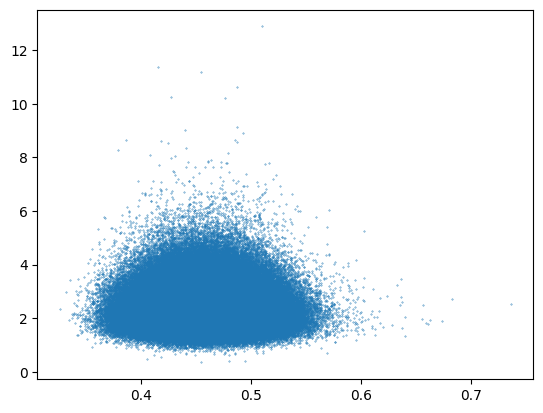

In [15]:
plot_similarities(ROOT + 'measures/test/', 'eng', True)

In [11]:
from os import listdir

all_files = [ROOT + 'measures/en_lemmas_similarities/' + s for s in listdir(ROOT + 'measures/en_lemmas_similarities/')] + [ROOT + 'measures/es_lemmas_similarities/' + s for s in listdir(ROOT + 'measures/es_lemmas_similarities/')]

In [12]:
print(len(all_files))

10370
